Load modules

In [10]:
from loader.loader import load_data
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.kernel_ridge import KernelRidge
from skcosmo.model_selection import atom_groups_by_frame
from sklearn.model_selection import GroupKFold
from feature_utils.parallel import get_features_in_parallel, get_optimal_radial_basis_hypers_parallel
from rascal.representations import SphericalInvariants as SOAP

Generating features

In [11]:
train_structures, test_structures, train_properties, test_properties = load_data("./make_tensor_data/train_tensor/CSD-3k+S546_shift_tensors.xyz", \
                                                                                    "./make_tensor_data/test_tensor/CSD-500+104-7_shift_tensors.xyz",random_subsample_train=200,random_subsample_test=200,selected_species=1)

hypers = dict(soap_type="PowerSpectrum",
              interaction_cutoff=6.016,
              max_radial=8,
              max_angular=8,
              gaussian_sigma_constant=0.259,
              gaussian_sigma_type="Constant",
              radial_basis="GTO",
              normalize=True,
              cutoff_smooth_width=0.3,
              cutoff_function_type="RadialScaling",
              optimization=
                    dict(
                            Spline=dict(
                               accuracy=1.0e-05
                            )
                        ),
              cutoff_function_parameters= dict(rate=1.587,
                    scale= 2.514,
                    exponent=4.564
                        ),
              compute_gradients=False,
              expansion_by_species_method="user defined",
              global_species=[1, 6, 7, 8, 16]
              )

hypers = get_optimal_radial_basis_hypers_parallel(hypers,train_structures,expanded_max_radial=20)
Xtrain = get_features_in_parallel(train_structures,SOAP,hypers)
Xtest = get_features_in_parallel(test_structures,SOAP,hypers)

structure_groups = atom_groups_by_frame(train_structures)

In [8]:
import numpy as np

In [9]:
Xtrain_cop = np.copy(Xtrain)

Initializing optimization grid/objective

In [ ]:
np.allequal(Xtr

In [16]:
pipe = Pipeline([
    ('model', KernelRidge( kernel_params={"n_jobs":-1}))
])

general_kernel_space = {
    "model":[KernelRidge(kernel_params={"n_jobs":-1})],
    "model__kernel": Categorical(["linear","poly","rbf"]),
    "model__gamma": Real(1e-6, 1e+1, prior='log-uniform'),
    "model__degree": Integer(1,8),
    "model__alpha": Real(1e-6, 1e+4, prior='log-uniform'),
    "model__coef0": Integer(0,1)
}

opt = BayesSearchCV(pipe,general_kernel_space,n_iter=5,cv=GroupKFold(n_splits=3),n_jobs=-1,scoring="neg_mean_squared_error",verbose=2)

"""def on_step(optim_result):
    score = opt.best_score_
    print("best score: %s" % score)
    if score >= 0.98:
        print('Interrupting!')
        return True"""

'def on_step(optim_result):\n    score = opt.best_score_\n    print("best score: %s" % score)\n    if score >= 0.98:\n        print(\'Interrupting!\')\n        return True'

Run objective

In [17]:
opt.fit(Xtrain, train_properties, groups=structure_groups)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


BayesSearchCV(cv=GroupKFold(n_splits=3),
              estimator=Pipeline(steps=[('model',
                                         KernelRidge(kernel_params={'n_jobs': -1}))]),
              n_iter=5, n_jobs=-1, scoring='neg_mean_squared_error',
              search_spaces={'model': [KernelRidge(alpha=1.5885958688587535e-05,
                                                   degree=4,
                                                   gamma=2.61281144296764,
                                                   kernel='poly',
                                                   kernel_params={'n_jobs': -1})],
                             'model__alpha': Real(low=1e-06, high=100...iform', transform='normalize'),
                             'model__coef0': Integer(low=0, high=1, prior='uniform', transform='normalize'),
                             'model__degree': Integer(low=1, high=8, prior='uniform', transform='normalize'),
                             'model__gamma': Real(low=1e-06, hig

In [ ]:
opt.

In [18]:
print("val. score: %s" % opt.best_score_)
print("test score: %s" % opt.score(Xtest, test_properties))
print("best params: %s" % str(opt.best_params_))

val. score: -0.7467014128459297
test score: -0.5034754595086551
best params: OrderedDict([('model', KernelRidge(alpha=1.5885958688587535e-05, degree=4, gamma=2.61281144296764,
            kernel='poly', kernel_params={'n_jobs': -1})), ('model__alpha', 1.5885958688587535e-05), ('model__coef0', 1), ('model__degree', 4), ('model__gamma', 2.61281144296764), ('model__kernel', 'poly')])


<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

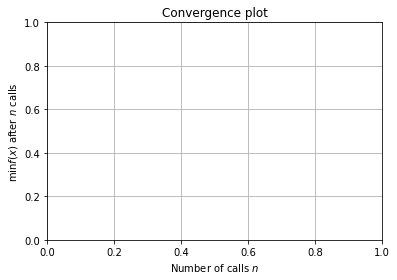

In [19]:
from skopt.plots import plot_convergence



In [22]:
type(opt.)

skopt.searchcv.BayesSearchCV

<AxesSubplot:title={'center':'Convergence plot'}, xlabel='Number of calls $n$', ylabel='$\\min f(x)$ after $n$ calls'>

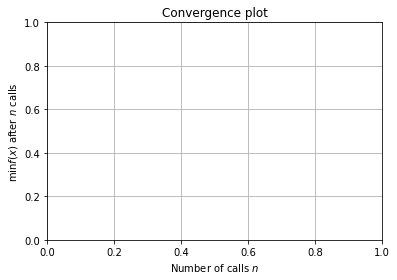

In [20]:
plot_convergence(opt)

In [21]:
from skopt import dump

In [24]:
from joblib import dump, load
dump(opt,"optimization_result")

['optimization_result']

In [23]:
sys.

In [27]:
import sys

In [28]:
sys.getsizeof(my_opt)

48

In [25]:
my_opt = load("optimization_result")

In [29]:
my_opt.score(Xtrain,train_properties)

-4.3847108269873197e-07